In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors,datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [34]:
iris = datasets.load_iris()

In [35]:
X = iris.data
y = iris.target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15,weights='distance')
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=15, p=2, weights='distance')

In [38]:
y_pred = clf.predict(X_test)

In [39]:
cm = confusion_matrix(y_test,y_pred)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.97368421052631582

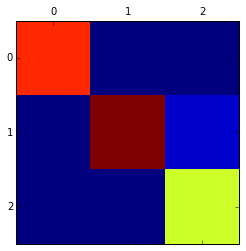

In [43]:
plt.matshow(cm)
print(cm)
accuracy_score(y_test,y_pred)

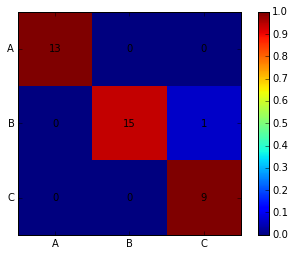

In [46]:
norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width = len(cm)
height = len(cm[0])

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('confusion_matrix.png', format='png')